
<p style="text-align:left">
   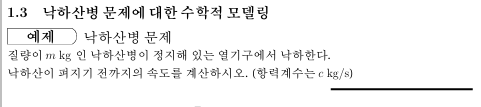
</p>


**문제 설명:**

-  **낙하산병 문제**는 질량이 m인 낙하산병이 중력 가속도 g를 받아 낙하하는 상황을 설명하고 있습니다.
-  낙하산병이 낙하하는 동안 공기 저항 c에 의해 감속되며, 결국 일정한 속도에 도달합니다.
-  목표는 이 시스템의 수학적 모델을 세워 최종 속도를 계산하는 것입니다.

 **1.** **수학 모델****:**

-  **Newton의 제2법칙**에 따라 질량에 가속도를 곱한 값은 힘과 같습니다: $F=ma=mg-cv$

여기서:

-  m: 낙하산병의 질량
-  g: 중력 가속도
-  c: 공기 저항 계수
-  v: 속도
-  따라서 운동 방정식은 다음과 같이 표현됩니다:

$$\frac{dv}{dt}=g-\frac{c}{m}v$$

-  이는 1차 미분 방정식으로, v(t)는 시간에 따른 낙하산병의 속도를 나타냅니다.
-  **해석 해**: 주어진 미분 방정식을 해석적으로 풀면 속도 v(t)는 다음과 같습니다:

$$v(t)=\frac{gm}{c}\left(1-e^{-\frac{c}{m}t} \right)$$

-  이는 낙하산병의 초기 속도가 0일 때의 해입니다. 시간이 충분히 경과하면 낙하산병은 최종 속도인 $\frac{gm}{c}$ 에 도달하게 됩니다.

 **2.** **Euler법을 사용한 수치 해석****:**

-  **Euler법**은 미분 방정식의 해를 수치적으로 계산하는 간단한 방법입니다.
-  시간 구간 $\Delta t$ 를 나누어, 다음과 같은 재귀적 계산을 통해 속도를 업데이트합니다:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$$v_{t+1} =v_t +\left(g-\frac{c}{m}v_t \right)\Delta t$$

-  즉, 다음 시간 $t+1$ 에서의 속도는 현재 시간 ttt에서의 속도에 $t\frac{dv}{dt}$ 를 곱한 값을 더한 형태로 계산됩니다.

**정리:**

-  이 문제는 낙하산병의 속도를 설명하는 간단한 1차 미분 방정식 문제입니다.
-  **해석적 방법**을 통해 정확한 해를 구할 수 있으며, 시간에 따른 낙하산병의 속도가 지수적으로 증가하여 일정한 값에 수렴하는 것을 알 수 있습니다.
-  **Euler법**은 수치적으로 이 문제를 풀기 위한 방법으로, 간단한 재귀적 방정식을 사용해 시간에 따른 속도를 계산할 수 있습니다.

In [1]:
% 매개변수 설정
m = 68.1;  % 질량 (kg)
c = 12.5;  % 항력 계수 (kg/s)
g = 9.81;  % 중력 가속도 (m/s^2)

t = linspace(0, 20, 21);  % 시간 벡터 생성 (0초부터 20초까지, 총 21개의 점)
time_interval = 1;  % 시간 간격 설정 (1초)

% 해석적 해 계산
a_velocity = @(t) g * m / c * (1 - exp(-c * t / m));
v1 = a_velocity(t);

% 수치적 해 계산 (오일러 방법)
n_velocity = @(v, dt) (v + (g - c * v / m) * dt);
v2 = zeros(size(t));  % 초기 속도 0으로 설정
for idx = 1:length(t)-1
    v2(idx+1) = n_velocity(v2(idx), time_interval);
end

% 오차 계산
error = abs(v1 - v2);

% 해석적 해와 수치적 해 출력
fprintf('해석적 해:\n');

해석적 해:

In [2]:
fprintf('%.2f ', v1);

0.00 8.96 16.42 22.63 27.80 32.10 35.68 38.66 41.14 43.20 44.92 46.35 47.54 48.53 49.35 50.04 50.61 51.09 51.48 51.81 52.08

In [3]:
fprintf('\n\n수치적 해:\n');

수치적 해:

In [4]:
fprintf('%.2f ', v2);

0.00 9.81 17.82 24.36 29.70 34.06 37.62 40.52 42.89 44.83 46.41 47.70 48.76 49.62 50.32 50.89 51.36 51.74 52.06 52.31 52.52


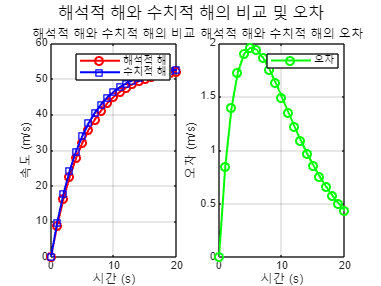

In [5]:

% 그래프 그리기
figure;

% 해석적 해와 수치적 해 그래프
subplot(1, 2, 1);
plot(t, v1, 'r-o', 'LineWidth', 1.5, 'DisplayName', '해석적 해');
hold on;
plot(t, v2, 'b-s', 'LineWidth', 1.5, 'DisplayName', '수치적 해');
xlabel('시간 (s)');
ylabel('속도 (m/s)');
title('해석적 해와 수치적 해의 비교');
legend('show');
grid on;

% 오차 그래프
subplot(1, 2, 2);
plot(t, error, 'g-o', 'LineWidth', 1.5, 'DisplayName', '오차');
xlabel('시간 (s)');
ylabel('오차 (m/s)');
title('해석적 해와 수치적 해의 오차');
legend('show');
grid on;

% 그래프 레이아웃 조정
sgtitle('해석적 해와 수치적 해의 비교 및 오차');


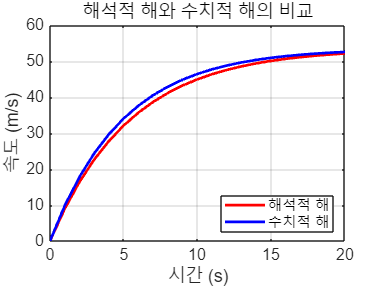

In [7]:
m = 68.1;
c = 12.5;
g = 9.81;

t = linspace(0,20,21); % 시간 벡터 생성 (0초부터 20초까지, 총 21개의 점)
time_interval = 1; % 시간 간격 설정 (1초)

a_velocity = @(t) g*m / c * (1 - exp(-c * t / m));
v1 = a_velocity(t);

n_velocity = @(v,dt) (v + (g - c*v/m) * dt);
v2 = 0*t; % 초기 속도 0으로 설정
for idx = 1:20
    v2(idx+1) = n_velocity(v2(idx), time_interval);
end

% 그래프 그리기
figure;
plot(t, v1, 'r', 'LineWidth', 2, 'MarkerSize', 8, 'DisplayName', '해석적 해');
hold on;
plot(t, v2, 'b', 'LineWidth', 2, 'MarkerSize', 8, 'DisplayName', '수치적 해');
xlabel('시간 (s)', 'FontSize', 12);
ylabel('속도 (m/s)', 'FontSize', 12);
title('해석적 해와 수치적 해의 비교', 'FontSize', 14);
legend('show', 'Location', 'southeast');
grid on;
set(gca, 'FontSize', 12); % 축 글꼴 크기 설정


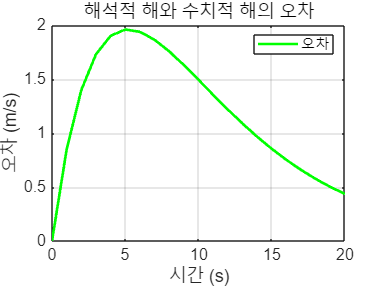

In [8]:

figure;
plot(t, error, 'g', 'LineWidth', 2, 'MarkerSize', 8, 'DisplayName', '오차');
xlabel('시간 (s)', 'FontSize', 12);
ylabel('오차 (m/s)', 'FontSize', 12);
title('해석적 해와 수치적 해의 오차', 'FontSize', 14);
legend('show', 'Location', 'northeast');
grid on;
set(gca, 'FontSize', 12); % 축 글꼴 크기 설정


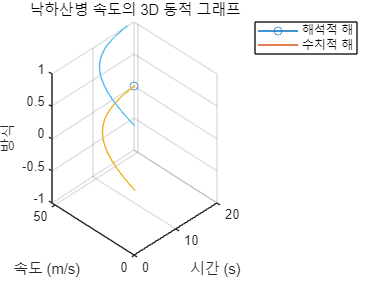

In [9]:
% MATLAB 코드: 3D 동적 그래프로 낙하산병 문제 표현

% 주어진 값
m = 68.1;
c = 12.5;
g = 9.81;

t = linspace(0, 20, 21); % 시간 벡터 (0초부터 20초까지, 1초 간격)
time_interval = 1; % 시간 간격

% 해석적 해
a_velocity = @(t) g*m / c * (1 - exp(-c * t / m));
v1 = a_velocity(t);

% 수치적 해 (Euler 방법)
n_velocity = @(v, dt) (v + (g - c*v/m) * dt);
v2 = zeros(size(t)); % 초기 속도 0으로 설정
for idx = 1:length(t)-1
    v2(idx+1) = n_velocity(v2(idx), time_interval);
end

% 3D 동적 그래프
figure;

% 해석적 해의 3D 동적 그래프
comet3(t, v1, zeros(size(t)), 0.1); % 0.1은 comet의 꼬리 길이 비율 설정
hold on;

% 수치적 해의 3D 동적 그래프
comet3(t, v2, ones(size(t)), 0.1); % 0.1은 comet의 꼬리 길이 비율 설정

% 그래프 설정
xlabel('시간 (s)');
ylabel('속도 (m/s)');
zlabel('방식');
title('낙하산병 속도의 3D 동적 그래프');
legend('해석적 해', '수치적 해');
grid on;
view([-45 30]); % 그래프 시점 조정


**1. 탄도 운동 방정식**


탄도 운동을 계산하기 위해서는 공기 저항을 무시하고, 중력만을 고려하는 이상적인 모델을 사용하겠습니다. 실제 포탄 운동은 훨씬 복잡하며, 공기 저항, 탄도의 회전 및 기타 요인들을 고려해야 하지만, 이 단순 모델로도 기본적인 탄도 경로를 예측할 수 있습니다.

-  초기 속도 ( $v_0$ �): 포탄 발사 속도
-  발사각 (θ): 발사 시 지면과의 각도
-  중력 가속도 (g): $9.81m/s^2$

수평 및 수직 운동 방정식:


$$x(t)=v_0 \cos (\theta )\cdot t$$

$$y(t)=v_0 \sin (\theta )\cdot t-\frac{1}{2}gt^2$$

**2. 경로추정**


105mm 곡사포의 최대 유효 사거리는 약 11km에서 14km 정도이며, 이는 사용되는 포탄 종류와 사격 조건에 따라 다를 수 있습니다. 여기서는 최대 유효 사거리를 12km로 가정하고 경로를 추정



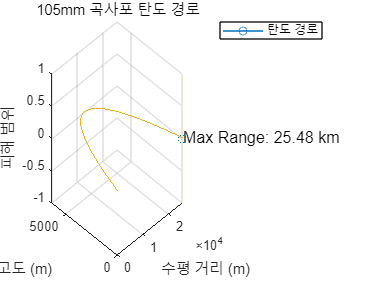

In [10]:
% MATLAB 코드: 105mm 곡사포 탄도 경로 및 피해 범위 시각화

% 탄도 운동 파라미터
v0 = 500; % 초기 속도 (m/s)
theta = 45; % 발사각 (degrees)
g = 9.81; % 중력 가속도 (m/s^2)

% 최대 유효 사거리에 도달하는 시간을 계산
t_flight = 2 * v0 * sind(theta) / g;

% 시간 벡터 설정 (0초부터 최대 비행 시간까지)
t = linspace(0, t_flight, 100);

% 탄도 경로 계산
x = v0 * cosd(theta) * t; % 수평 거리
y = v0 * sind(theta) * t - 0.5 * g * t.^2; % 수직 거리

% 피해 범위 파라미터 (고정)
blast_radius = 30; % 폭발 파괴 반경 (m)
fragment_radius = 100; % 파편 피해 반경 (m)

% 3D 동적 그래프
figure;

% 탄도 경로 그리기
comet3(x, y, zeros(size(x)), 0.1); % 포탄의 3D 경로

hold on;

% 폭발 지점 및 피해 반경 그리기
[X, Y, Z] = sphere(50);
surf(blast_radius * X + x(end), blast_radius * Y + y(end), blast_radius * Z, ...
    'FaceAlpha', 0.3, 'EdgeColor', 'none', 'FaceColor', 'r'); % 파괴 범위
surf(fragment_radius * X + x(end), fragment_radius * Y + y(end), fragment_radius * Z, ...
    'FaceAlpha', 0.1, 'EdgeColor', 'none', 'FaceColor', 'y'); % 파편 범위

% 그래프 설정
xlabel('수평 거리 (m)');
ylabel('고도 (m)');
zlabel('피해 범위');
title('105mm 곡사포 탄도 경로');
legend('탄도 경로');
grid on;
view([-45 30]); % 그래프 시점 조정

% 최대 유효 사거리 표시
text(x(end), y(end), 0, sprintf('Max Range: %.2f km', x(end) / 1000), 'FontSize', 12, 'Color', 'k');


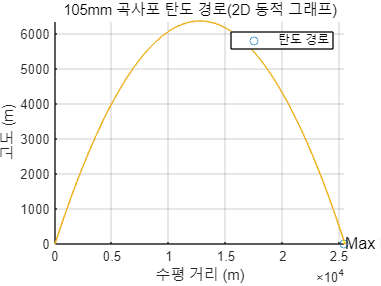

In [11]:
% MATLAB 코드: 105mm 곡사포 탄도 경로 및 피해 범위 시각화 (2D 동적 그래프)

% 탄도 운동 파라미터
v0 = 500; % 초기 속도 (m/s)
theta = 45; % 발사각 (degrees)
g = 9.81; % 중력 가속도 (m/s^2)

% 최대 유효 사거리에 도달하는 시간을 계산
t_flight = 2 * v0 * sind(theta) / g;

% 시간 벡터 설정 (0초부터 최대 비행 시간까지)
t = linspace(0, t_flight, 100);

% 탄도 경로 계산
x = v0 * cosd(theta) * t; % 수평 거리
y = v0 * sind(theta) * t - 0.5 * g * t.^2; % 수직 거리

% 피해 범위 파라미터 (고정)
blast_radius = 30; % 폭발 파괴 반경 (m)
fragment_radius = 100; % 파편 피해 반경 (m)

% 2D 동적 그래프
figure;

% 탄도 경로 그리기 (2D)
comet(x, y); % 포탄의 2D 경로

hold on;

% 폭발 지점 및 피해 반경 그리기
theta_circle = linspace(0, 2*pi, 100);
% 파괴 범위 원
plot(x(end) + blast_radius * cos(theta_circle), y(end) + blast_radius * sin(theta_circle), 'r--');
% 파편 범위 원
plot(x(end) + fragment_radius * cos(theta_circle), y(end) + fragment_radius * sin(theta_circle), 'y--');

% 그래프 설정
xlabel('수평 거리 (m)');
ylabel('고도 (m)');
title('105mm 곡사포 탄도 경로(2D 동적 그래프)');
legend('탄도 경로');
grid on;

% 최대 유효 사거리 표시
text(x(end), y(end), sprintf('Max Range: %.2f km', x(end) / 1000), 'FontSize', 12, 'Color', 'k');


신경 가스 작용제(G\-series nerve agents)와 같은 화학탄이 낙탄되고 공기 중으로 퍼져나가는 과정을 모델링하기 위해서는 화학탄의 분산과 화학 물질의 확산, 그리고 기상 조건을 고려해야 합니다.


하지만 정확한 예측을 위해서는 다양한 복잡한 요인들이 필요하며, 여기서는 일반적인 시나리오를 가정하여 단순한 모델을 작성하였습니다.

-  **가정된 조건**:
-  화학탄이 지면에 낙탄되어 터지면서 가스 형태의 GB 작용제가 분산됩니다.
-  바람의 영향은 없다고 가정합니다.
-  환경 온도와 압력이 일정하며, 화학 작용제는 지면에서 구형으로 퍼져 나갑니다.
-  최대 도달 거리를 예측하기 위해 확산 방정식을 사용합니다.

 $r(t)=r_0 +\sqrt{2Dt}$ �

-  $r(t)$ : 시간 t에서의 확산 반경
-  $r_0$ �: 초기 분산 반경
-  D: 확산 계수 (일반적인 화학 물질의 확산 계수는 $0.1-1.0\,m^2 /s$ 정도)
-  t: 시간
-  **가정된 조건 2:**
-   **대류 속도** vv**v**: 대류에 의한 작용제의 이동 속도 (여기서는 xxx 방향으로 이동).
-  **시간 및 공간**: 작용제는 시간에 따라 확산하며 동시에 바람에 의해 수평으로 이동합니다.
-  확산에 의한 반경 증가:

 $r(t)=r_0 +\sqrt{2Dt}$ �

-  대류에 의한 이동 거리:

$$x_{\textrm{center}} (t)=v\cdot t$$


In [12]:
% MATLAB 코드: 대류를 고려한 신경 가스 작용제의 3D 확산 및 오염 표시 (반경 동적 변화)

% 확산 및 대류 파라미터
r0 = 1; % 초기 분산 반경 (m)
D = 0.1; % 확산 계수 (m^2/s)
v = 0.2; % 대류 속도 (매우 천천히 이동, m/s)
t_total = 200; % 총 시간 (s)
num_steps = 100; % 시간 단계 수

% 시간 벡터 설정
t = linspace(0, t_total, num_steps);

% 3D 동적 그래프
figure;
[X, Y, Z] = sphere(50);

% 오염된 영역을 저장할 수 있는 배열
contaminated = [];

for i = 1:length(t)
    % 확산 반경 계산
    r = r0 + sqrt(2 * D * t(i));

    % 대류에 의한 이동 거리 계산
    x_center = v * t(i);

    % 3D 구형 확산
    surf(r * X + x_center, r * Y, r * Z, 'FaceAlpha', 0.2, 'EdgeColor', 'none', 'FaceColor', 'b');
    hold on;

    % 이전에 오염된 영역을 표시 (각 반경이 커지는 것을 고려)
    if ~isempty(contaminated)
        for j = 1:size(contaminated, 1)
            % 반경을 시간에 따라 증가시키기 위해 sqrt(2 * D * contaminated(j, 3))
            r_prev = contaminated(j, 2) + sqrt(2 * D * contaminated(j, 3));
            surf(r_prev * X + contaminated(j, 1), r_prev * Y, r_prev * Z, ...
                'FaceAlpha', 0.1, 'EdgeColor', 'none', 'FaceColor', 'r');
        end
    end

    % 현재 확산된 영역을 오염된 영역으로 저장 (x 위치, 초기 반경, 경과 시간)
    contaminated = [contaminated; x_center, r0, t(i)];

    % 그래프 설정
    axis([-10 60 -40 40 -10 10]); % x 방향으로 대류 이동을 고려한 범위 설정
    xlabel('X (m)');
    ylabel('Y (m)');
    zlabel('Z (m)');
    title('신경 가스 작용제의 대류와 확산 (3D 동적 그래프)');
    grid on;
    drawnow;
    hold off;
end


**1. 유한차분법 (FDM)****이론**

-  **정의**: 유한차분법은 미분 방정식의 연속적인 미분을 차분으로 근사하여 푸는 방법입니다.
-  **원리**: 도함수를 유한한 차분으로 근사하는 원리에 기반을 두고 있습니다.
-  예를 들어, 함수 $u(x)$ 의 일차 도함수는 다음과 같이 근사할 수 있습니다:

 $\frac{du}{dx}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$ �

-  **장점**: 구현이 비교적 간단하고, 균등한 격자(grid) 구조에 적합합니다.
-  **단점**: 복잡한 지형이나 경계 조건을 처리하기 어려우며, 정밀도를 높이기 위해 많은 계산이 필요합니다.

**수식**

-  편미분 방정식의 경우, $u_t =u_{xx}$ 와 같은 1차 미분 방정식을 고려해보면:

$$\frac{\partial u}{\partial t}\approx \frac{u(t+\Delta t,x)-u(t,x)}{\Delta t}$$

 $\frac{\partial^2 u}{\partial x^2 }\approx \frac{u(t,x+\Delta x)-2u(t,x)+u(t,x-\Delta x)}{(\Delta x)^2 }$ �

-  이러한 근사를 사용하여 미분 방정식을 대수 방정식으로 변환하고, 이산적인 시간과 공간에서 해를 구합니다.

**구체적인 사례: 1D 열전도 방정식**

-  1차원 열전도 방정식은 다음과 같습니다:

 $\begin{array}{l} \newline frac\partial u\partial t=\alpha \frac{\partial^2 u}{\partial x^2 } \end{array}$ �

-  FDM을 사용하여 이를 풀면 다음과 같이 근사할 수 있습니다:

$$u_i^{n+1} =u_i^n +\frac{\alpha \Delta t}{(\Delta x)^2 }(u_{i+1}^n -2u_i^n +u_{i-1}^n )$$


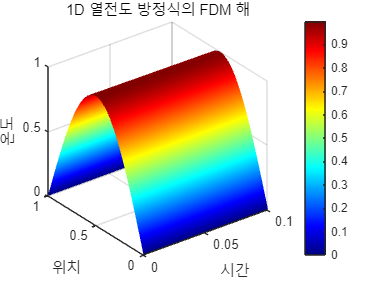

In [13]:
% 파라미터 설정
L = 1; % 막대 길이
T = 0.1; % 총 시간
nx = 50; % 공간 격자 수
nt = 500; % 시간 스텝 수
alpha = 0.01; % 열 확산 계수
dx = L / (nx - 1); % 공간 스텝 크기
dt = T / (nt - 1); % 시간 스텝 크기

% 초기 및 경계 조건
u = zeros(nx, nt);
x = linspace(0, L, nx);
t = linspace(0, T, nt);
u(:, 1) = sin(pi * x); % 초기 조건

% FDM을 이용한 계산
for n = 1:nt-1
    for i = 2:nx-1
        u(i, n+1) = u(i, n) + alpha * dt / dx^2 * (u(i+1, n) - 2 * u(i, n) + u(i-1, n));
    end
end

% 결과 시각화
[X, T] = meshgrid(t, x); % 시간과 공간의 격자 생성
figure;
surf(X, T, u);
shading interp; % 부드럽게 표현
colormap jet; % 컬러맵 적용
colorbar; % 컬러바 추가
xlabel('시간');
ylabel('위치');
zlabel('온도');
title('1D 열전도 방정식의 FDM 해');



**2. 유한요소법 (FEM)****이론**

-  **정의**: 유한요소법은 연속적인 미분 방정식을 분할하여 요소(Element)로 나누고, 각 요소에서 근사해를 구하는 방법입니다.
-  **원리**: 문제 영역을 요소로 분할하고, 각 요소에서 약한 형태(Weak Formulation)를 통해 미분 방정식을 풀어 전체 영역의 근사해를 구합니다.
-  기본적으로 미분 방정식을 적분 방정식 형태로 변환하고, 선형 조합을 통해 각 요소에서 근사합니다.
-  **장점**: 복잡한 지형, 경계 조건, 비균등 격자 등에 대한 처리에 유리합니다.
-  **단점**: 수식의 유도가 복잡하고, 구현이 어려울 수 있습니다.

**수식**

-  일반적인 2차 경계값 문제:

$$-\frac{d}{dx}\left(k\frac{du}{dx}\right)=f~~\textrm{on}~~[a,b]$$

-  FEM은 이를 요소별로 분할하고 약한 형태로 변환하여 근사해를 구합니다. $\int_a^b k\frac{du}{dx}\frac{dv}{dx}\,dx=\int_a^b fv\,dx$
-  여기서 v는 시험 함수(Test Function)입니다.
-  요소의 크기, 수와 형상을 자유롭게 선택할 수 있어 복잡한 경계 조건과 구조에 대한 해석이 가능합니다.

**구체적인 사례: 1D 푸아송 방정식**

-  푸아송 방정식은 다음과 같습니다:

$$-\frac{d^2 u}{dx^2 }=f$$

-  FEM을 사용하여 이를 풀면 각 요소에서 선형 조합을 사용하여 해를 근사합니다.


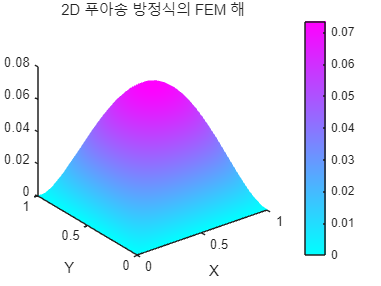

In [14]:
% PDE 모델 생성
model = createpde();

% 영역 생성 및 지오메트리 추가
R1 = [3,4,0,1,1,0,0,0,1,1]';
gd = [R1];
sf = 'R1';
ns = char('R1')';
g = decsg(gd,sf,ns);
geometryFromEdges(model,g);

% 경계 조건 설정
applyBoundaryCondition(model,'dirichlet','Edge',1:model.Geometry.NumEdges,'u',0);

% PDE 계수 설정
specifyCoefficients(model,'m',0,'d',0,'c',1,'a',0,'f',1);

% 메시 생성
generateMesh(model,'Hmax',0.1);

% PDE 풀기
results = solvepde(model);

% 결과 시각화
pdeplot(model,'XYData',results.NodalSolution,'ZData',results.NodalSolution);
xlabel('X');
ylabel('Y');
title('2D 푸아송 방정식의 FEM 해');



!!!EndOutputRegion!!!